# Issue #3 - Traversal of the space of train/test splits

## Content

- [Objective](#obj)
- [Methodolgy](#mth)
- [Exploratory Data Analysis](#eda)
- [Observations](#ob)
- [Conslusions](#cc)

<a id='obj'></a>
### Objective 
In designing classifiers, models are developed on a training set. But how does one divide a dataset into training and test sets? With few training data, our parameter estimates will have greater variance, whereas with few test data, our performance statistic will have greater variance. What is the compromise? From application or total number of exemplars in the dataset, we usually split the dataset into training (60 to 80%) and testing (40 to 20%) without any principled reason.

We want to investigate how much the performance score computed on the test set depends on the choice of train/test split proportion. Eg. how would our performance estimate change if we used a 60/40 split rather than 80/20?

<a id='mth'></a>
### Methodolgy
We build a function that takes a scikit-learn estimator([Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) and a [dataset](https://github.com/elie-wanko/PRESC/blob/master/datasets/defaults.csv), then compute an evaluation metric over a grid of train/test split proportions from 0 to 100%. To assess variability, for each split proportion we should resplit and recompute the metric multiple times. A prepliminary analysis of our data set (defaults.csv) can be referenced [here](https://github.com/elie-wanko/PRESC/blob/Issue%232-Train_and_test_a_classification_model/dev/elie_wanko/Issue%20%232%20-%20Train%20and%20test%20a%20classification%20model.ipynb)

<a id='eda'></a>
### EDA
#### Importing Libraries

In [1]:
# Basic Computations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Dynamic Markdowns
from IPython.display import Markdown as md

import warnings; warnings.simplefilter('ignore')

In [2]:
#**Adding module’s sub-directory to Pythons path**
import os
import sys
sys.path.insert(0, os.path.abspath('../elie_wanko/modules'))
import helpers, summary

#### Data Pre-Processing

In [3]:
df_data = pd.read_csv("defaults_data.csv")
df_data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Analysis

In our analysis, we are considering the following train/test split proportions shown in the table below.

In [4]:
test_sizes = np.arange(5, 100, 5)
tt_sizes = np.array([(lambda x: [100-x, x])(x) for x in test_sizes])
pd.DataFrame(tt_sizes, range(len(tt_sizes)), ["Training Sizes", "Testing Sizes"]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Training Sizes,95,90,85,80,75,70,65,60,55,50,45,40,35,30,25,20,15,10,5
Testing Sizes,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95


**Results**

In [5]:
knn_ttsplits_summary = summary.ttsplits(data=df_data, sizes=test_sizes, model='knn')
knn_ttsplits_summary.style.apply(
    helpers.highlight_max, subset=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'], color='#71a5bd').apply(
    helpers.highlight_min, subset=['Log Loss', 'Av. Processing Time(sec.)'], color='#71a5bd').hide_index()

Test Size,Accuracy Score,Precision Score,Recall Score,F1 Score,Log Loss,Av. Processing Time(sec.)
5,1.000000,1.000000,1.000000,1.000000,0.000000,0.110306
10,0.900000,0.666700,1.000000,0.800000,3.454000,0.105607
15,0.866700,0.666700,0.666700,0.666700,4.605200,0.098539
20,0.850000,0.666700,0.500000,0.571400,5.180900,0.106418
25,0.880000,0.666700,0.500000,0.571400,4.144700,0.137734
30,0.900000,0.666700,0.500000,0.571400,3.453900,0.105965
35,0.885700,0.666700,0.400000,0.500000,3.947300,0.100637
40,0.875000,0.500000,0.400000,0.444400,4.317400,0.119302
45,0.866700,0.400000,0.400000,0.400000,4.605200,0.155067
50,0.860000,0.333300,0.400000,0.363600,4.835500,0.130546


In [6]:
logreg_ttsplits_summary = summary.ttsplits(data=df_data, sizes=test_sizes, model='logreg')
logreg_ttsplits_summary.style.apply(
    helpers.highlight_max, subset=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'], color='#71bd7e').apply(
    helpers.highlight_min, subset=['Log Loss', 'Av. Processing Time(sec.)'], color='#71bd7e').hide_index()

Test Size,Accuracy Score,Precision Score,Recall Score,F1 Score,Log Loss,Av. Processing Time(sec.)
5,0.800000,1.000000,0.500000,0.666700,6.907800,4.493840
10,0.900000,1.000000,0.500000,0.666700,3.453900,4.566688
15,0.866700,1.000000,0.333300,0.500000,4.605200,4.243213
20,0.850000,1.000000,0.250000,0.400000,5.180800,5.362842
25,0.880000,1.000000,0.250000,0.400000,4.144700,4.531228
30,0.900000,1.000000,0.250000,0.400000,3.453900,3.744606
35,0.885700,1.000000,0.200000,0.333300,3.947300,4.584730
40,0.900000,1.000000,0.200000,0.333300,3.453900,4.543998
45,0.888900,0.500000,0.200000,0.285700,3.837700,3.935386
50,0.900000,0.500000,0.200000,0.285700,3.453900,4.637134


#### Variation of scores at different K-Folds splits

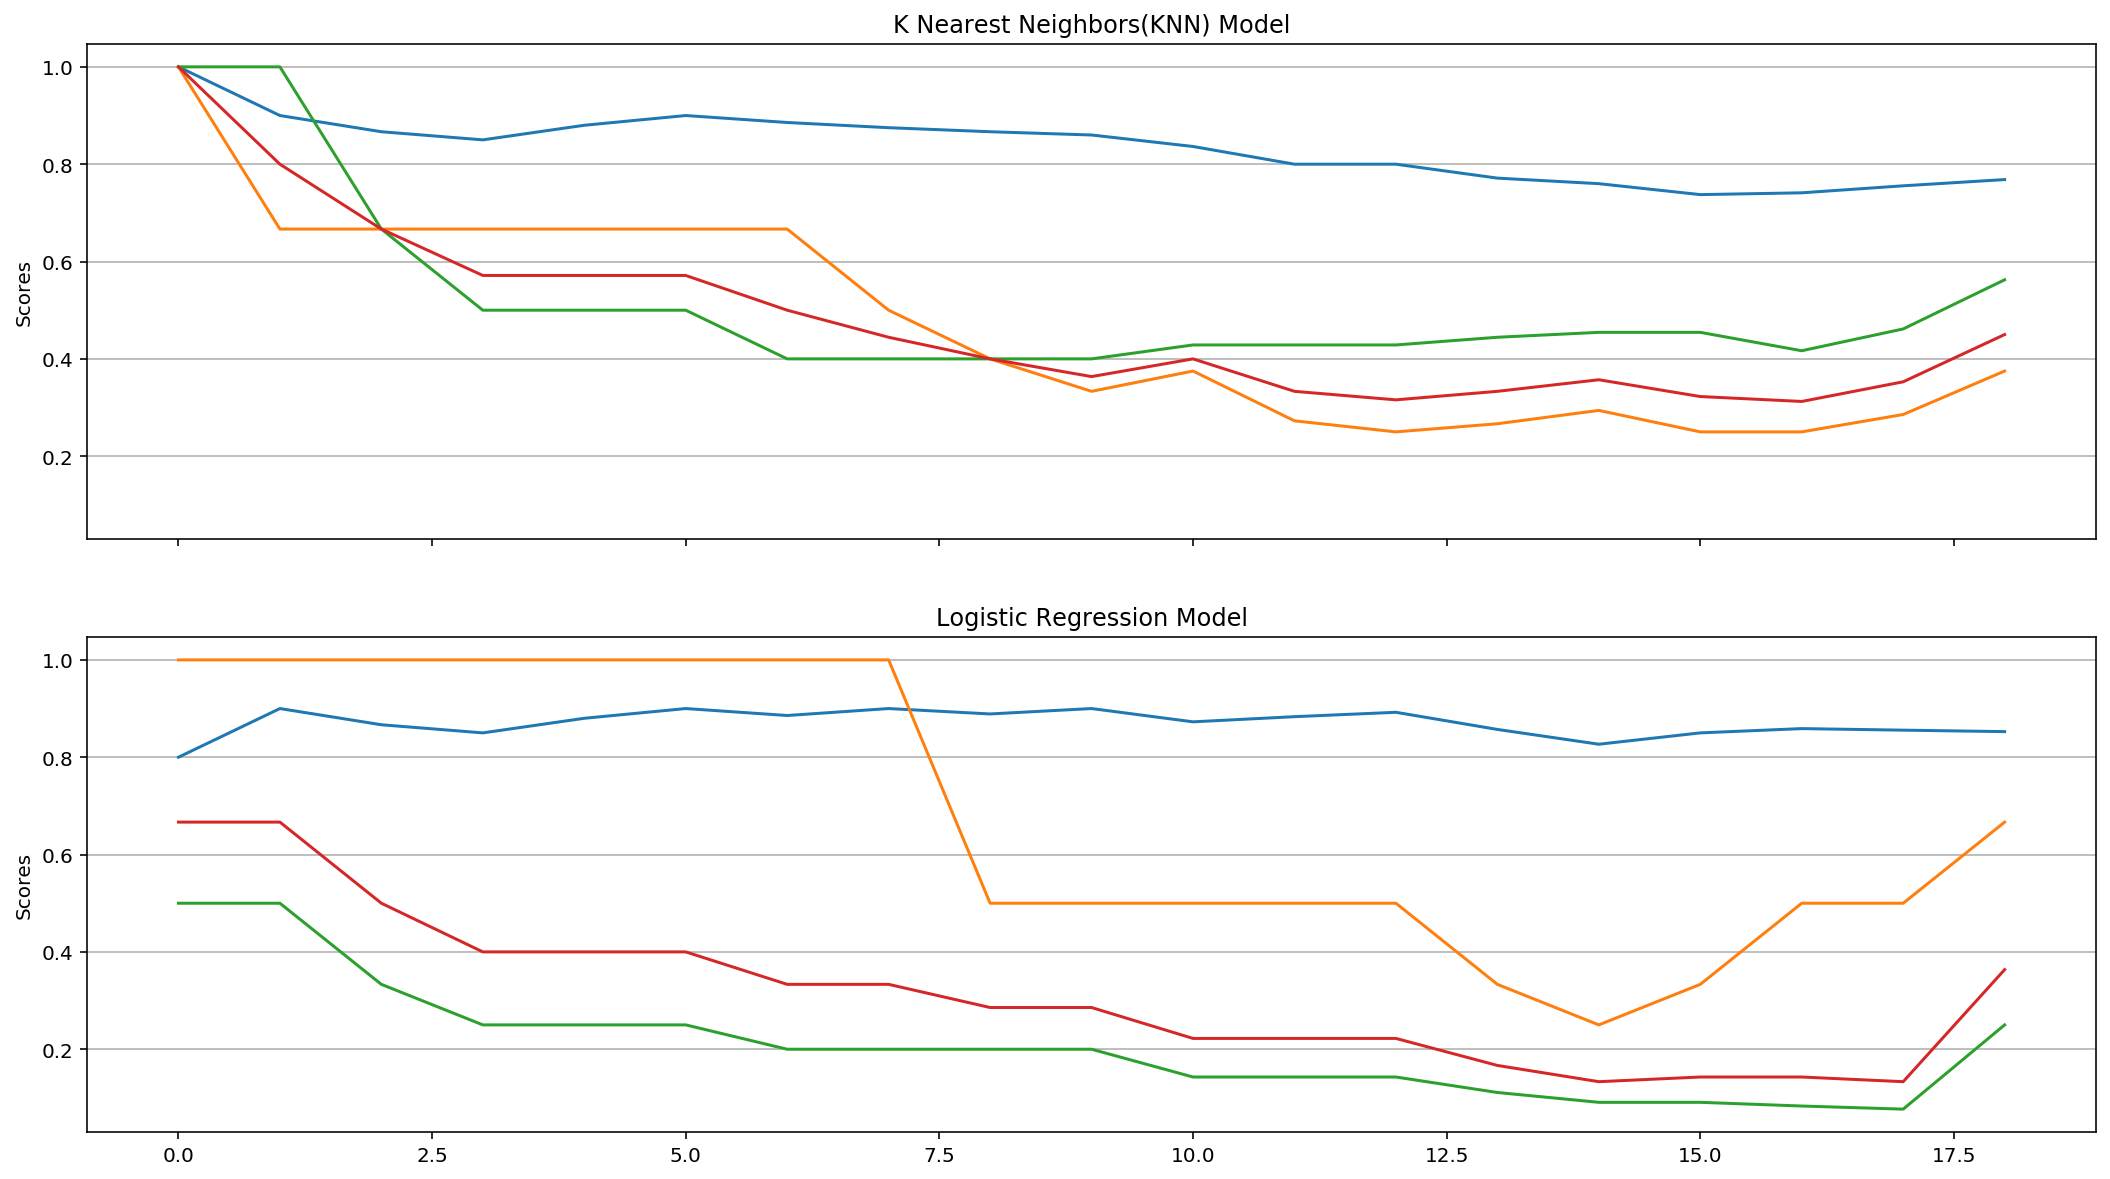

In [7]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
fig.set_figwidth(18)
fig.set_figheight(10)
# fig.suptitle( x=0.25,  y=0.95, size='x-large')

ax1.set_title("K Nearest Neighbors(KNN) Model")
ax1.plot(knn_ttsplits_summary.filter(knn_ttsplits_summary.columns[1:-2]))
ax1.set_ylabel("Scores")
ax1.grid(axis='y')

ax2.set_title("Logistic Regression Model")
ax2.plot(logreg_ttsplits_summary.filter(logreg_ttsplits_summary.columns[1:-2]))
ax2.set_ylabel('Scores')
ax2.grid(axis='y')

plt.show()

#### Logistic Loss/Cross-entropy Loss at different K-Folds splits

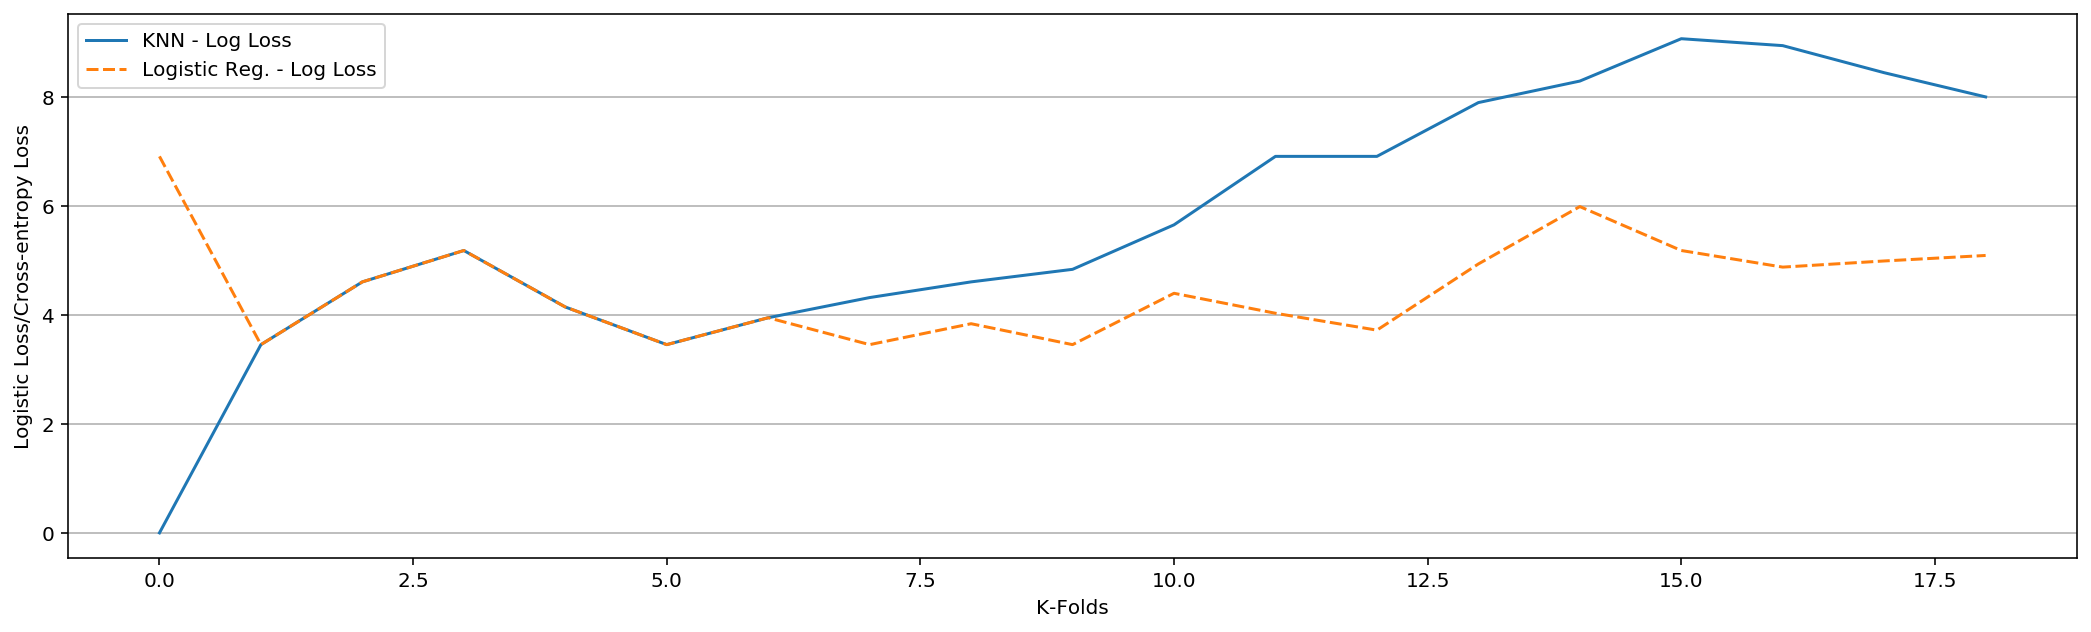

In [8]:
log_losses = pd.concat([knn_ttsplits_summary.filter(knn_ttsplits_summary.columns[-2:-1]),
                             logreg_ttsplits_summary.filter(logreg_ttsplits_summary.columns[-2:-1])], axis=1)
log_losses.columns=['KNN - Log Loss', 'Logistic Reg. - Log Loss']

helpers.trend_plot(data=log_losses, xlabel = "K-Folds", ylabel = "Logistic Loss/Cross-entropy Loss")

#### Processing time at different K-Folds splits

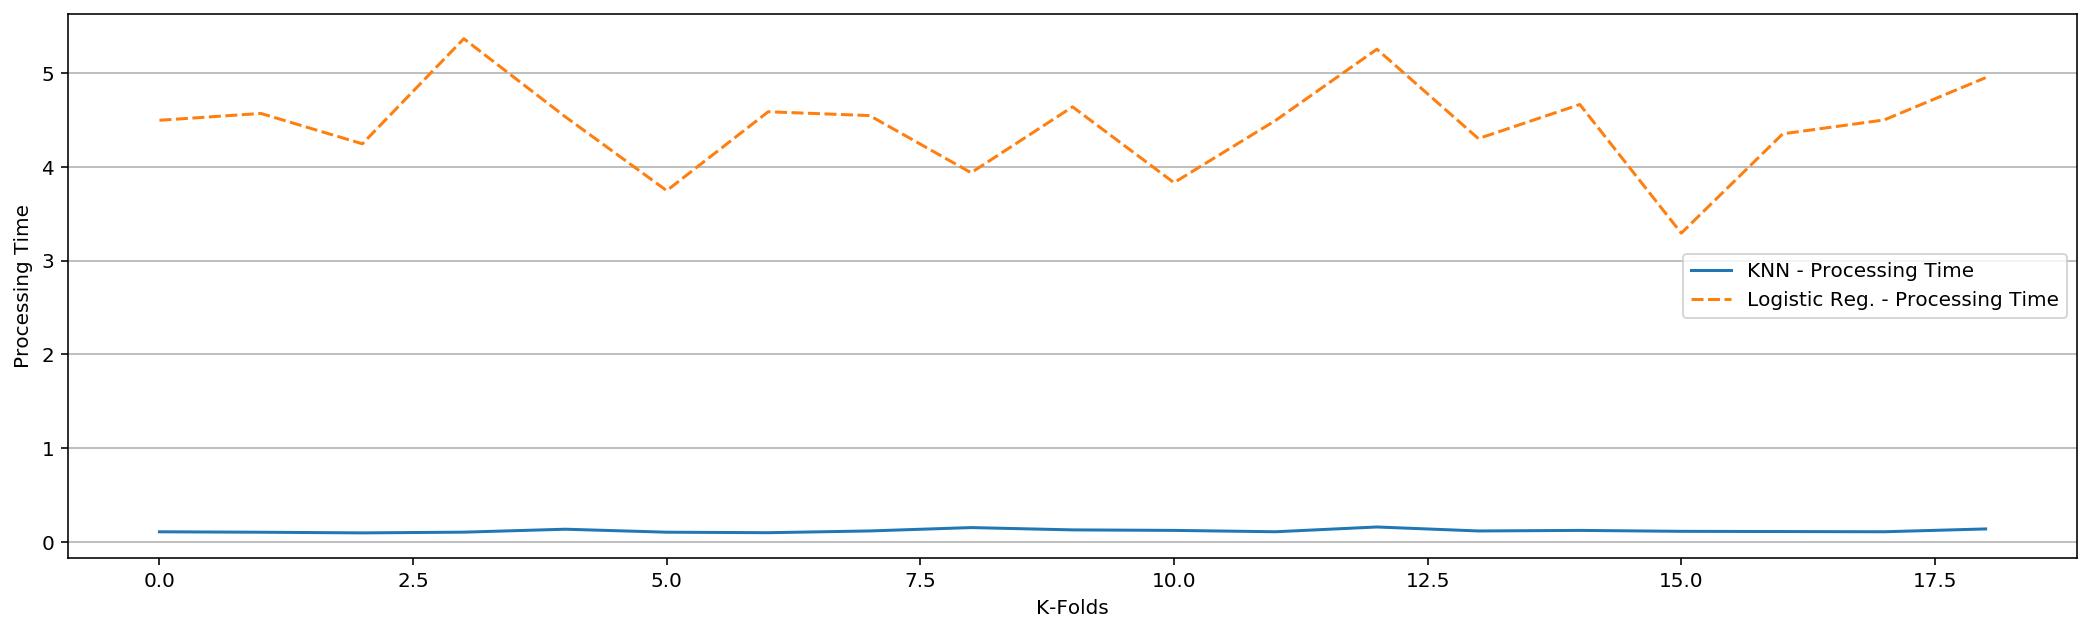

In [9]:
processing_times = pd.concat([knn_ttsplits_summary.filter(knn_ttsplits_summary.columns[-1:]),
                             logreg_ttsplits_summary.filter(logreg_ttsplits_summary.columns[-1:])], axis=1)
processing_times.columns=['KNN - Processing Time', 'Logistic Reg. - Processing Time']

helpers.trend_plot(data=processing_times, xlabel = "K-Folds", ylabel = "Processing Time")

<a id='ob'></a>
### Observations
Given the results above, the KNN clearly out-performs the Log Reg model. This can be clearly seen in the tables above by comparing the results highlighted in 'blue' for the KNN model and 'green' for the Log Reg Model. We can better vizualize this from the graphs below. The best results for both models are obtained at the following train:test splits...
* KNN: 95:5 with perfect scores of 1.0, loss of 0.0 and processing time of les than a second which begs the question if our data is not over-fiiting since this is too god to be true. More analysis will be dealt inorder to find out the effect of differetn hyper-parameters
* Log.Reg.: 90:10 with a perfect precision score only. however, the rest aren't so bad since they are above average. However it takes longer to process, that is about 4 times the processing time of the KNN model. Thereafter, scores gradually decrease except for the precision score which remains at 1.0 till we reach a test size of around 45%. The accuracy score remains at an average 0.8ish through out the analysis but we can't conclude anything out of it alone.


<a id='cc'></a>
### Conclusions

Despite the poor performance of the Log Reg, depending on the use case scenario especially where we need to understand our results, it will be prefereable to use it because they are more interpretable and there are fewer hyper-parameters to work with.